In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [3]:
print('Version used:')
!python --version

Version used:
Python 2.7.13 :: Continuum Analytics, Inc.


In [4]:
from datetime import datetime as dt
print('Last edit on: {}'.format(dt.now()))

Last edit on: 2017-06-17 15:08:44.996414


# Tutorial 1 | Astronomy Series: Exoplanet Goldrush

In this tutorial, we will learn how to:
* access exoplanets data from NASA's database,
* create basic plots that describe their properties, and
* fit a simple regression line  to model the relationship between two variables.

Note: If you want to run the following Python scripts, please make sure you have Python and Jupyter notebook installed. If you are unsure how to do this, check out our [another tutorial](https://jpdeleon.github.io/2016-11-29-Python-Set-up/) on how to set-up your machine.

## About the database
The [NASA Exoplanet Archive](http://exoplanetarchive.ipac.caltech.edu/) provides data and various tools related to exoplanets. See for example the [table of confirmed exoplanet data here](http://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=planets).

While we can make scatter plots and histograms using these tools, we would like to play with the data and do additional visualization and analysis. Thanks to their [API](https://en.wikipedia.org/wiki/Application_programming_interface), we can [query data from their website](http://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html) and print results directly on this notebook. 

Let's begin.

# Accessing data

In [5]:
# Python 2 and 3 compatible
try:
    from urllib.request import urlopen, Request
    from urllib.error import HTTPError
except ImportError:
    from urllib2 import urlopen, Request, HTTPError
import time

url = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
response = urlopen(url)
html = response.read()

outpath = 'confirmed_planets_{}.csv'.format(time.strftime("%Y%m%d")) #include date of download

print("Downloading data from URL: {}".format(url))

with open(outpath,'wb') as f:
     f.write(html)
print("Saved file: {}".format(outpath))

Saved file: confirmed_planets_20170617.csv


What the code does above is use the `urllib2` library to fetch data from the website given by the `url` variable. The response of NASA's API is saved into the variable called `response`. This data is only readable by machine so we have to parse it using `response.read()` and save the parsed results into the `html` variable. We want to save the read data into our local machine and name it `confirmed_planets_(date accessed)`.

Great! We downloaded the default set of downloadable exoplanet data into a .csv file found in our local folder (filesize is ~1.2 Mb). Above we used Python 2.7 but you can use Python 3.5 (newer version) to do the same task as shown below.

Let's check the downloaded file. Since we expect that the data is huge, we only want print the first 500 characters.

In [7]:
html[:500]

'pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassn,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densn,pl_ttvflag,'

The data doesn't look pretty. Good thing Python has a library that handles .csv (comma-separated values) quite nicely. In the following, we will use the Python library called [pandas](http://pandas.pydata.org/) to play with the data.

In [8]:
import pandas as pd
df = pd.read_csv(outpath)
print('Showing the top 5 rows of the downloaded data:\n')
df.head()

Showing the top 5 rows of the downloaded data:



,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,...,st_massblend,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,st_radn,pl_nnotes,rowupdate
0,HD 240237,b,Radial Velocity,1,745.70000,13.80000,-13.80000,0.0,1,1.900,...,0.0,2,32.00,1.00,-1.00,0.0,0.0,2,0,2014-11-19
1,HD 290327,b,Radial Velocity,1,2443.00000,205.00000,-117.00000,0.0,1,3.430,...,0.0,1,1.00,0.01,-0.01,0.0,0.0,1,0,2014-11-19
2,HD 285507,b,Radial Velocity,1,6.08810,0.00180,-0.00180,0.0,1,NaN,...,0.0,1,0.66,0.05,-0.05,0.0,0.0,1,0,2014-05-14
3,HD 330075,b,Radial Velocity,1,3.38773,0.00008,-0.00008,0.0,1,0.039,...,0.0,3,NaN,NaN,NaN,NaN,0.0,1,0,2014-11-19
4,HIP 5158,c,Radial Velocity,2,9017.76000,3180.74000,-3180.74000,0.0,1,7.700,...,0.0,1,NaN,NaN,NaN,NaN,0.0,0,0,2015-09-10


After importing pandas with codename `pd`, we saved its result into variable `df` which stands for **dataframe**. We only print the head (i.e. first 5 items) of the dataframe with 80 columns above. 

How about that? Look's pretty, right? Now we can make sense of this data. Basically we have the host name (meaning the parent star of the exoplanet) on the first column, the planet's designated letter on the second, and so on. The integers 0, 1, 2, ... in the leftmost are indices which will be useful later. For example, the actual name of the exoplanet in the first row is HD 240237 b. If there are more planets around the same star, we call them c, d, e and so on in the order of discovery, not their distance from the host star (my misconception!).

Using pandas, let's print all the columns. You can look up the meaning of each of the (83 default) columns [here](http://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html). Watch out their UNITS!

In [9]:
df.columns

Index([u'pl_hostname', u'pl_letter', u'pl_discmethod', u'pl_pnum',
       u'pl_orbper', u'pl_orbpererr1', u'pl_orbpererr2', u'pl_orbperlim',
       u'pl_orbpern', u'pl_orbsmax', u'pl_orbsmaxerr1', u'pl_orbsmaxerr2',
       u'pl_orbsmaxlim', u'pl_orbsmaxn', u'pl_orbeccen', u'pl_orbeccenerr1',
       u'pl_orbeccenerr2', u'pl_orbeccenlim', u'pl_orbeccenn', u'pl_orbincl',
       u'pl_orbinclerr1', u'pl_orbinclerr2', u'pl_orbincllim', u'pl_orbincln',
       u'pl_bmassj', u'pl_bmassjerr1', u'pl_bmassjerr2', u'pl_bmassjlim',
       u'pl_bmassn', u'pl_bmassprov', u'pl_radj', u'pl_radjerr1',
       u'pl_radjerr2', u'pl_radjlim', u'pl_radn', u'pl_dens', u'pl_denserr1',
       u'pl_denserr2', u'pl_denslim', u'pl_densn', u'pl_ttvflag',
       u'pl_kepflag', u'pl_k2flag', u'ra_str', u'dec_str', u'ra', u'st_raerr',
       u'dec', u'st_decerr', u'st_posn', u'st_dist', u'st_disterr1',
       u'st_disterr2', u'st_distlim', u'st_distn', u'st_optmag',
       u'st_optmagerr', u'st_optmaglim', u'st_optmagb

Another way to know the shape of our data (i.e. the number of rows and columns) is:

In [10]:
print('number of rows & cols: {}'.format(df.shape))

number of rows & cols: (3496, 83)


Have you experienced working on an excel file with 3496 rows and 83 columns of data? Using python, you will realize how easy it is to work such large datasets.

# Planet discovery methods

The third column of `df` is `pl_discmethod` which stands for exoplanet detection method. There are several methods astronomers look for exoplanets and it is enough if you know the 5 standard techniques as follows.

* Transit
* Radial Velocity (RV a.k.a Doppler)
* Direct Imaging
* Microlensing
* Astrometry

This [wiki](https://en.wikipedia.org/wiki/Methods_of_detecting_exoplanets) does a good job explaining each of them and it is instructive for you to study them separately if you are interested to learn more on the concepts behind each method.

Now, let's determine which methods were used to discover the known exoplanets in our dataset. 

In [11]:
print('Exoplanet Detection Techniques:\n')
set(df['pl_discmethod'])

Exoplanet Detection Techniques:



{'Astrometry',
 'Eclipse Timing Variations',
 'Imaging',
 'Microlensing',
 'Orbital Brightness Modulation',
 'Pulsar Timing',
 'Pulsation Timing Variations',
 'Radial Velocity',
 'Transit',
 'Transit Timing Variations'}

The natural question to ask is:

### How many planets are discovered by each method?

In [12]:
print('Number of Detected Planets per Technique:\n')
df['pl_discmethod'].value_counts()

Number of Detected Planets per Technique:



Transit                          2732
Radial Velocity                   638
Microlensing                       46
Imaging                            43
Transit Timing Variations          15
Eclipse Timing Variations           8
Orbital Brightness Modulation       6
Pulsar Timing                       5
Pulsation Timing Variations         2
Astrometry                          1
Name: pl_discmethod, dtype: int64

The code above is almost self-explanatory. We accessed the `pl_discmethod` column of `df` and use the function `value_counts()` to count the number of occurrence of the terms in each row entry.

Now we understand that Transit and RV are currently the most prolific methods to discover exoplanets nowadays. Do you know why? That's a good research topic for those who are new to exoplanetary science. Hint: You can find out the answers [here](http://spiff.rit.edu/classes/resceu/resceu.html). 

On the other hand, Astrometry technique is still in its infancy. We expect astrometry will detect more planets with the help of [GAIA satellite](http://sci.esa.int/gaia/).

# Additional parameters

Alternatively, we may need to include some additional parameters in the table not given by default. So let's add the following parameters to the default list:
* Planet column
 * year of discovery
 * discovery reference
 * discovery instrument
 * link to exoplanet encyclopedia
* Stellar column 
 * parallax
 * radial velocity [km/s]
 * spectral type
 * stellar surface gravity [log10(cm/s)]
 * stellar luminosity [log(Solar)]
 * stellar density [g/cm^3]
 * stellar metallicity [dex]
 * stellar age [Gyr]

In [13]:
import urllib2
import time

url = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
pl_params = "pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjerr1,pl_bmassjerr2,pl_radj,pl_radjerr1,pl_radjerr2,pl_dens,pl_instrument,pl_disc_refname,pl_pelink,"
st_params = "ra,dec,st_dist,st_teff,st_mass,st_rad,rowupdate,st_plx,gaia_plx,gaia_dist,st_pm,gaia_pm,st_radv,st_spstr,st_logg,st_lum,st_dens,st_metfe,st_age,st_nplc"
full_url= url+'&select='+ pl_params + st_params

response = urllib2.urlopen(full_url)
#response = urllib2.urlopen(url)
html = response.read()

outpath_extended = 'confirmed_planets_extended_{}.csv'.format(time.strftime("%Y%m%d")) #include date of download

print("Downloading data from URL: {}\n".format(url))

with open(outpath_extended,'wb') as f:
     f.write(html)
print("Saved file: {}".format(outpath_extended))


Saved file: confirmed_planets_extended_20170617.csv


In [14]:
df = pd.read_csv(outpath_extended)
df.head()

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_pm,gaia_pm,st_radv,st_spstr,st_logg,st_lum,st_dens,st_metfe,st_age,st_nplc
0,HD 240237,b,Radial Velocity,2011,1,745.70000,1.900,0.400,NaN,5.300,...,5.9,4.4,NaN,K2 III,1.66,2.490,NaN,-0.26,NaN,0
1,HD 290327,b,Radial Velocity,2009,1,2443.00000,3.430,0.080,NaN,2.540,...,102.6,102.5,29.56,G8 V,4.42,-0.140,NaN,-0.11,NaN,0
2,HD 285507,b,Radial Velocity,2013,1,6.08810,NaN,0.086,NaN,0.917,...,126.7,126.2,38.15,K4.5 V,4.67,NaN,NaN,0.13,0.625,0
3,HD 330075,b,Radial Velocity,2004,1,3.38773,0.039,0.000,NaN,0.620,...,250.4,250.5,61.28,K1,4.22,-0.330,NaN,0.08,6.200,0
4,HIP 5158,c,Radial Velocity,2011,2,9017.76000,7.700,0.140,NaN,15.040,...,227.9,230.3,NaN,NaN,4.37,-0.959,NaN,0.10,6.000,0


You can do the same by clicking Select Columns in the upper left corner of the [table data](http://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=planets) in the website, checking the relevant parameters, clicking Update Selection, and finally, downloading using the Download Table button ($\sim$2 mb). 

Now, let's import the csv as a pandas dataframe.

In [15]:
import pandas as pd

df = pd.read_csv(outpath_extended,delimiter=',')
print('Planet data with more parameters:')
df.head()

Planet data with more parameters:


,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_pm,gaia_pm,st_radv,st_spstr,st_logg,st_lum,st_dens,st_metfe,st_age,st_nplc
0,HD 240237,b,Radial Velocity,2011,1,745.70000,1.900,0.400,NaN,5.300,...,5.9,4.4,NaN,K2 III,1.66,2.490,NaN,-0.26,NaN,0
1,HD 290327,b,Radial Velocity,2009,1,2443.00000,3.430,0.080,NaN,2.540,...,102.6,102.5,29.56,G8 V,4.42,-0.140,NaN,-0.11,NaN,0
2,HD 285507,b,Radial Velocity,2013,1,6.08810,NaN,0.086,NaN,0.917,...,126.7,126.2,38.15,K4.5 V,4.67,NaN,NaN,0.13,0.625,0
3,HD 330075,b,Radial Velocity,2004,1,3.38773,0.039,0.000,NaN,0.620,...,250.4,250.5,61.28,K1,4.22,-0.330,NaN,0.08,6.200,0
4,HIP 5158,c,Radial Velocity,2011,2,9017.76000,7.700,0.140,NaN,15.040,...,227.9,230.3,NaN,NaN,4.37,-0.959,NaN,0.10,6.000,0


# Transiting and RV planets

Let's divide df into separate smaller dataframes based on discovery/detection method. In this tutorial, we will focus on transit and RV techniques in the meantime.

In [16]:
#get all rows with Transit in the pl_disc column and put it into idx1
idx1 = df['pl_discmethod'] == 'Transit'
#create a new df called df_transit and put the contents of idx1
df_transit = df[idx1]

#do the same for RV
idx2 = df['pl_discmethod'] == 'Radial Velocity'
df_RV = df[idx2]

Let's see if the new dataframe called df_transit contains only exoplanets discovered by transit method: 

In [17]:
print('Planets discovered via transit method:')
df_transit.head()

Planets discovered via transit method:


,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_pm,gaia_pm,st_radv,st_spstr,st_logg,st_lum,st_dens,st_metfe,st_age,st_nplc
25,Kepler-897,b,Transit,2016,1,8.047264,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.41,NaN,NaN,0.04,4.37,0
26,Kepler-898,b,Transit,2016,1,5.870619,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.66,NaN,NaN,-0.06,3.98,0
27,Kepler-899,b,Transit,2016,1,19.178913,NaN,NaN,NaN,NaN,...,14.5,NaN,NaN,NaN,4.49,NaN,NaN,-0.06,4.07,0
28,Kepler-900,b,Transit,2016,1,6.991309,NaN,NaN,NaN,NaN,...,NaN,NaN,-18.32,NaN,4.60,NaN,NaN,-0.01,4.57,0
29,Kepler-901,b,Transit,2016,1,3.517494,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.70,NaN,NaN,-0.30,3.80,0


In [18]:
print('Planets discovered via RV method:')
df_RV.head()

Planets discovered via RV method:


,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_pm,gaia_pm,st_radv,st_spstr,st_logg,st_lum,st_dens,st_metfe,st_age,st_nplc
0,HD 240237,b,Radial Velocity,2011,1,745.70000,1.900,0.400,NaN,5.300,...,5.9,4.4,NaN,K2 III,1.66,2.490,NaN,-0.26,NaN,0
1,HD 290327,b,Radial Velocity,2009,1,2443.00000,3.430,0.080,NaN,2.540,...,102.6,102.5,29.56,G8 V,4.42,-0.140,NaN,-0.11,NaN,0
2,HD 285507,b,Radial Velocity,2013,1,6.08810,NaN,0.086,NaN,0.917,...,126.7,126.2,38.15,K4.5 V,4.67,NaN,NaN,0.13,0.625,0
3,HD 330075,b,Radial Velocity,2004,1,3.38773,0.039,0.000,NaN,0.620,...,250.4,250.5,61.28,K1,4.22,-0.330,NaN,0.08,6.200,0
4,HIP 5158,c,Radial Velocity,2011,2,9017.76000,7.700,0.140,NaN,15.040,...,227.9,230.3,NaN,NaN,4.37,-0.959,NaN,0.10,6.000,0


Let's count the number of planets discovered per year by each technbique, first transit then RV. Here, we will sort the results by index in descending order. Otherwise, the year will not be printed in consecutive order.

In [19]:
print('Number of discovered transiting planets per year')
df_transit['pl_disc'].value_counts(sort='False').sort_index(axis=0, ascending=False)

Number of discovered transiting planets per year


2017      31
2016    1448
2015      99
2014     797
2013      78
2012      92
2011      79
2010      46
2009      18
2008      17
2007      16
2006       5
2004       5
2002       1
Name: pl_disc, dtype: int64

In [20]:
print('Number of discovered RV planets per year')
df_RV['pl_disc'].value_counts(sort='False').sort_index(axis=0, ascending=False)

Number of discovered RV planets per year


2017    22
2016    47
2015    47
2014    42
2013    32
2012    34
2011    47
2010    42
2009    73
2008    38
2007    35
2006    21
2005    33
2004    18
2003    22
2002    29
2001    12
2000    16
1999    13
1998     6
1997     1
1996     6
1995     1
1989     1
Name: pl_disc, dtype: int64

It appears that RV has fewer detected planets than Transit method but it has significantly longer history. Let's visualize these in a histogram. 

# Histogram of exoplanet discovery

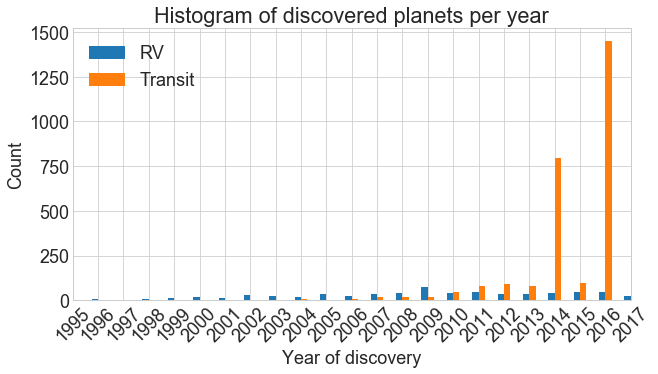

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
#set plotting style
plt.style.use('seaborn-whitegrid')
#set font size
plt.rcParams.update({'font.size': 18})

#create a new 2-column dataframe
df2= pd.DataFrame(df_RV['pl_disc'].value_counts(sort=False)) 
df2['Transit'] = df_transit['pl_disc'].value_counts(sort=False)
#combine the two dataframes into 1 for easier plotting
df2.columns = ['RV','Transit']

ax = df2.sort_index(axis=0).plot.bar(figsize=(10,5))
#rotate the x-axis ticks
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
#ax.set_ylim([0,1000])
#the interval [1995, 2015] can't be used since it is an array of year; 0=1989 and len(df2)=2016
ax.set_xlim([1,len(df2)-1]) 
ax.set_ylabel('Count')
ax.set_xlabel('Year of discovery')
ax.set_title('Histogram of discovered planets per year')
plt.show()

What just happened in 2014 (and 2016)? Also you can see that the number of detected planets by Transit method (green) overtook RV (blue) around 2010. This might give an [idea][1] why.

[1]: https://en.wikipedia.org/wiki/Kepler_(spacecraft)

# Plotting basic parameters of exoplanets detected by Transit method

Now let's plot the period of the transiting exoplanets as a function of orbital radius (a.k.a semi-major axis). Note that the column `pl_orbsmax` and `pl_orbper` refers to the exoplanet's orbital distance and period, respectively.

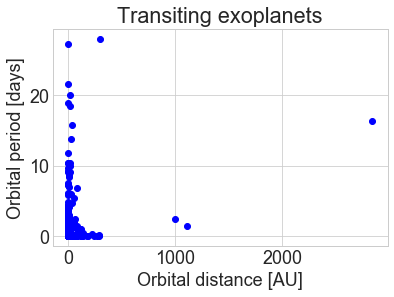

In [22]:
#create an empty figure
fig=plt.figure()

plt.scatter(x=df_transit['pl_orbper'], y=df_transit['pl_bmassj'], color='blue')
#below is for putting the labels on x and y-axes
plt.xlabel('Orbital distance [AU]')
plt.ylabel('Orbital period [days]')
#to add title
plt.title('Transiting exoplanets')
#to reveal plot
plt.show()

Since we want to see datapoints, we used the `scatter` function of pyplot abbreviated as `plt`. The x- and y-variables as well as color are specified.

What can you tell about the plot? Describe below. Note that the unit of orbital period is **days** and that of orbital distance is **AU** (Astronomical Unit; 1 AU = Earth-Sun distance = $1.496\times10^{11}$ meters). In comparison, the orbital distance of Mercury is 0.39 AU. 

One visualization technique we can use to spread out a plot that is very crowded like shown above is to use the logarithmic plot. Remember that $\log_{10}100 = 2$. So let's try making a log-log scatter plot.  

To make it easier, let's put solar system objects as references. See the relevant values [here](http://nssdc.gsfc.nasa.gov/planetary/factsheet/). We will also convert the units from days to year.

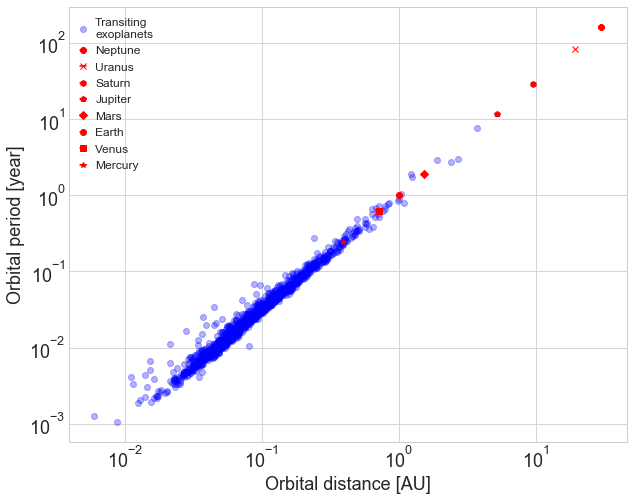

In [23]:
#define the masses and orbital radii of some system planets
one_year = 365.2 #days

orbper_Neptune   = 59800
orbrad_Neptune   = 30.07 #AU

orbper_Uranus    = 30589
orbrad_Uranus    = 19.19 #AU

orbper_Saturn    = 10747
orbrad_Saturn    = 9.54 #AU

orbper_Jupiter   = 4331
orbrad_Jupiter   = 5.2 #AU

orbper_Mars      = 687.0
orbrad_Mars      = 1.52 #AU

orbper_Earth     = 365.2
orbrad_Earth     = 1.0 #AU

orbper_Venus     = 224.7
orbrad_Venus     = 0.72 #AU

orbper_Mercury   = 88.0
orbrad_Mercury   = 0.39 #AU

fig = plt.figure(figsize=(10,8))
#scatter plot is just a plot specified to have 'o' markers
plt.plot(df_transit['pl_orbsmax'], df_transit['pl_orbper']/one_year, 'bo', label='Transiting\nexoplanets', alpha=0.3)

#plot solar system values with labels; there is a better way to do this but suffice for now
plt.plot(orbrad_Neptune, orbper_Neptune/one_year, marker='8', color='r', label='Neptune')
plt.plot(orbrad_Uranus, orbper_Uranus/one_year, marker='x', color='r', label='Uranus')
plt.plot(orbrad_Saturn, orbper_Saturn/one_year, marker='h', color='r', label='Saturn')
plt.plot(orbrad_Jupiter, orbper_Jupiter/one_year, marker='p', color='r', label='Jupiter')

plt.plot(orbrad_Mars, orbper_Mars/one_year, marker='D', color='r', label='Mars')
plt.plot(orbrad_Earth, orbper_Earth/one_year, marker='o', color='r', label='Earth')
plt.plot(orbrad_Venus, orbper_Venus/one_year, marker='s', color='r', label='Venus')
plt.plot(orbrad_Mercury, orbper_Mercury/one_year, marker='*', color='r', label='Mercury')

#include axes with labels
plt.xlabel('Orbital distance [AU]')
plt.ylabel('Orbital period [year]')
#change to logarithmic scale
plt.xscale('log')
plt.yscale('log')
#add a translucent legend, etc.
plt.legend(loc='best', numpoints = 1, fontsize=12, handlelength=0.5, fancybox=True, framealpha=0.5)
plt.show()

Interesting! There are two things we can immediately say about this plot. 
* First, most of the points lie along the same line roughly. 
* Second, most of the detected transiting exoplanets have shorter periods and smaller orbital distances than the solar system planets.

Since the datapoints are almost collinear, can we say that there is a linear relationship between orbital period and orbital distance? The answer is **NO**. The above is a log-log plot and therefore a power relation exists between them.

In fact this relationship is so general (applies to solar system bodies as well as exoplanets) that we consider this a universal law:
\begin{equation}
P \propto d^{x}
\end{equation}
where $d$ is the orbital distance and $P$ is the period. What law are we referring to? What is the value of the exponent, $x$?
 
It might be helpful if we fit a regression line on the log-log plot above and determine the exponent, $x$.

# Fitting a regression line

Before we can fit a regression line, we should take note that not all exoplanets have orbital period and orbital distance measurements. We can use the `len()` function to count the number of exoplanets which have measured values.

In [24]:
print('Transiting planets with known orbital distance:')
len(df_transit['pl_orbsmax']>0) #>0 to count only non-zero values

Transiting planets with known orbital distance:


2732

In [25]:
print('Transiting planets with known orbital period:')
len(df_transit['pl_orbper']>0)

Transiting planets with known orbital period:


2732

So they both have 2732 measurements (at the time of writing). Does it mean that each transiting exoplanet has both measured period and orbital radius? Using the `query` function will give the answer. 

In [26]:
print('Transiting planets with BOTH known orbital distance and period:')
count_both = df_transit.query('pl_orbsmax> 0 and pl_orbper>0') #find entries with non-zero values for each parameter
len(count_both)

Transiting planets with BOTH known orbital distance and period:


1287

So we see that only 1287 transiting exoplanets have both measured periods and orbital radii (at the time of writing). Let's rename this as `df_transit2` to be used for fitting.

In [27]:
df_transit2= df_transit.query('pl_orbsmax> 0 and pl_orbper>0')

Python has a lot of libraries especially for statistics. In this case, we will use scipy that already have functions for regression called `linregress`. To seek help, try

In [28]:
from scipy import stats

stats.linregress?

A screen will pop-up showing the documentation about `lingress`. To learn more about linear regression, click [here](https://jpdeleon.github.io/2017-01-08-part-1-Linear-Regression/).

In [29]:
from scipy import stats
import numpy as np

#convert to log first
x=np.log(df_transit2['pl_orbsmax'])
y=np.log(df_transit2['pl_orbper']/one_year)

#do the fitting
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#print results; \t for tab, \n for new line
print('Results of linear fit (in log space):\n')
print('slope\t\t={0}\nintercept\t={1}\nr-value\t\t={2}\np-value\t\t={3}\nstandard error\t={4}' \
      .format(slope, intercept, r_value, p_value, std_err))

Results of linear fit (in log space):

slope		=1.4664767374
intercept	=-0.0433361886361
r-value		=0.989212347224
p-value		=0.0
standard error	=0.00605812372413


The value we got for the slope is about **1.47** or about **3/2**. In other words,

\begin{equation}
P \propto d^{3/2}
\end{equation}

Does it give you an idea now what law we are referring to? [Here's the answer](https://en.wikipedia.org/wiki/Kepler's_laws_of_planetary_motion#Third_law).

This relationship is strong since, the r-squared value is:

In [30]:
print('r-squared= {:.2f}%'.format(r_value**2*100)) # ** is for raising into power

r-squared= 97.85%


Now let's see the regression line.

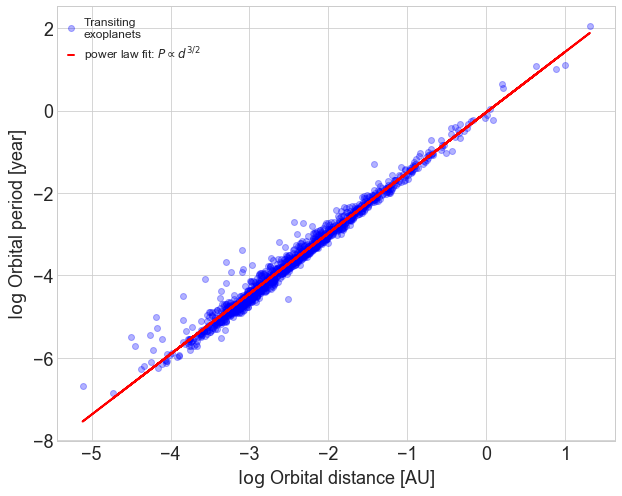

In [31]:
#regression function
def regline(xvalues):
    return slope*xvalues + intercept

# import matplotlib.pyplot as plt
# %matplotlib inline
plt.style.use('seaborn-whitegrid')

#convert to log first
x=np.log(df_transit2['pl_orbsmax'])
y=np.log(df_transit2['pl_orbper']/one_year) #convert to unit of year

fig = plt.figure(figsize=(10,8))
#scatter plot is just a plot specified to have 'o' markers
plt.plot(x, y, 'bo', label='Transiting\nexoplanets', alpha=0.3)
plt.plot(x, regline(x), 'r-', lw=2, label='power law fit: $P\propto d^{3/2}$')

#include axes with labels
plt.xlabel('$\log$ Orbital distance [AU]')
plt.ylabel('$\log$ Orbital period [year]')
#change to logarithmic scale

#add a translucent legend, etc.
plt.legend(loc='best', numpoints = 1, fontsize=12, handlelength=0.5, fancybox=True, framealpha=0.5)
plt.show()

Another powerful python library is called [seaborn](http://seaborn.pydata.org/). It offers more advanced plotting capabilities so be sure to learn how to use them. Using [`seaborn.regplot`](http://seaborn.pydata.org/generated/seaborn.regplot.html) is a quick way of visualizing regression plots.

    import seaborn as sb
    sb.set_style('whitegrid')

    f, ax = plt.subplots(figsize=(6, 4))
    ax.set(xscale="log", yscale="log")
    sb.regplot(x="pl_orbsmax", y="pl_orbper", data=df_transit2, ax=ax)

    ax.set_xlabel('Orbital distance [AU]')
    ax.set_ylabel('Orbital period [year]')

Now, let's proceed to the second point that most of the detected transiting exoplanets have very short periods at small orbital distances compared to that of solar system planets. We ask, what is the size of these transiting planets much closer than Mercury? So let's plot the radius as a function orbital distance. Again, we will plot this in convenient Jupiter-radius units and year. 

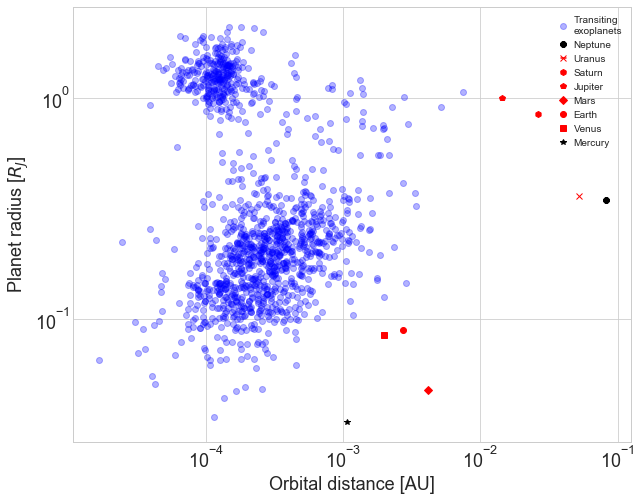

In [32]:
#define the masses and orbital radii of some system planets
one_year      = 365.2 #days

rad_Neptune   = 49.528e6 #m
orbrad_Neptune   = 30.07 #AU

rad_Uranus    = 51.118e6 #m
orbrad_Uranus    = 19.19 #AU

rad_Saturn    = 120.536e6 #m
orbrad_Saturn    = 9.54 #AU

rad_Jupiter   = 142.984e6 #m
orbrad_Jupiter   = 5.2 #AU

rad_Mars      = 6.792e6 #m
orbrad_Mars      = 1.52 #AU

rad_Earth     = 12.756e6 #m
orbrad_Earth     = 1.0 #AU

rad_Venus     = 12.104e6 #m
orbrad_Venus     = 0.72 #AU

rad_Mercury   = 4.879e6 # #m
orbrad_Mercury   = 0.39 #AU

# import matplotlib.pyplot as pl
# %matplotlib inline
fig = plt.figure(figsize=(10,8))
#scatter plot is just a plot specified to have 'o' markers
plt.plot(df_transit['pl_orbsmax']/one_year, df_transit['pl_radj'], 'bo', alpha=0.3, label='Transiting\nexoplanets')

#plot solar system values with labels; there is a better way to do this but suffice for now
plt.plot(orbrad_Neptune/one_year, rad_Neptune/rad_Jupiter, marker='8', color='k', label='Neptune')
plt.plot(orbrad_Uranus/one_year, rad_Uranus/rad_Jupiter, marker='x', color='r', label='Uranus')
plt.plot(orbrad_Saturn/one_year, rad_Saturn/rad_Jupiter, marker='h', color='r', label='Saturn')
plt.plot(orbrad_Jupiter/one_year, rad_Jupiter/rad_Jupiter, marker='p', color='r', label='Jupiter')

plt.plot(orbrad_Mars/one_year, rad_Mars/rad_Jupiter, marker='D', color='r', label='Mars')
plt.plot(orbrad_Earth/one_year, rad_Earth/rad_Jupiter, marker='o', color='r', label='Earth')
plt.plot(orbrad_Venus/one_year, rad_Venus/rad_Jupiter, marker='s', color='r', label='Venus')
plt.plot(orbrad_Mercury/one_year, rad_Mercury/rad_Jupiter, marker='*', color='k', label='Mercury')

#include axes with labels
plt.xlabel('Orbital distance [AU]')
plt.ylabel('Planet radius [$R_{J}$]')
#change to logarithmic scale
plt.xscale('log')
plt.yscale('log')
#add a translucent legend, etc.
plt.legend(loc='best', numpoints = 1, fontsize=10, handlelength=0.5, fancybox=True, framealpha=0.5)
plt.show()

Now, we see two distinct blobs above. The top one and bottom represents transiting planets that have radii comparable to that of Jupiter and Neptune, respectively whose orbits are much closer to their stars than Mercury's orbit around the Sun. This is an interesting discovery because this fact is not consistent to what we know about our solar system. Immediate questions that arise are:

* How can a gas giant (or terrestrial planet) be so close to the star without evaporating?
* Did it form there as it is (i.e. in-situ)? It seems very unlikely though!
* Did it migrate inwards from an initial location farther out from the star (which is cold enough for gas to exist)?
* Also, why are there two distinct blobs in the plot? 
* If the blob feature is real, do they correspond to two distinct exoplanet classes/populations?
* Or perhaps this is an observational bias?


These are questions that I will leave unanswered because they are currently open problems/ hot topics in exoplanetary science.

# RV, Imaging, Microlensing and other techniques

Let's see what the distribution look like if we plot exoplanets based on othe detection methods. First, we will create new `df`s corresponding to their techniques.  

In [33]:
#Do the same for RV
idx2 = df['pl_discmethod'] == 'Radial Velocity'
df_RV = df[idx2]

idx3 = df['pl_discmethod'] == 'Imaging'
df_DI = df[idx3]

idx4 = df['pl_discmethod'] == 'Microlensing'
df_ML = df[idx4]

idx5 = df['pl_discmethod'] == 'Astrometry'
df_A = df[idx5]

idx6 = df['pl_discmethod'] == 'Transit Timing Variations'
df_TTV = df[idx6]

idx7 = df['pl_discmethod'] == 'Eclipse Timing Variations'
df_ETV = df[idx7]

idx8 = df['pl_discmethod'] == 'Pulsar Timing'
df_PT = df[idx8]

idx9 = df['pl_discmethod'] == 'Pulsation Timing Variations'
df_PTV = df[idx9]

idx10 = df['pl_discmethod'] == 'Orbital Brightness Modulation'
df_OBM = df[idx10]

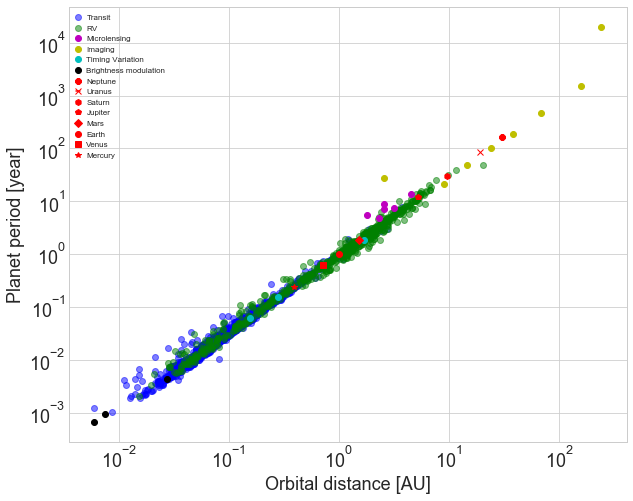

In [34]:
one_year = 365.2 #days

orbper_Neptune   = 59800
orbrad_Neptune   = 30.07 #AU

orbper_Uranus    = 30589
orbrad_Uranus    = 19.19 #AU

orbper_Saturn    = 10747
orbrad_Saturn    = 9.54 #AU

orbper_Jupiter   = 4331
orbrad_Jupiter   = 5.2 #AU

orbper_Mars      = 687.0
orbrad_Mars      = 1.52 #AU

orbper_Earth     = 365.2
orbrad_Earth     = 1.0 #AU

orbper_Venus     = 224.7
orbrad_Venus     = 0.72 #AU

orbper_Mercury   = 88.0
orbrad_Mercury   = 0.39 #AU

fig = plt.figure(figsize=(10,8))
#scatter plot is just a plot specified to have 'o' markers
plt.plot(df_transit['pl_orbsmax'], df_transit['pl_orbper']/one_year, 'bo', label='Transit', alpha=0.5)
plt.plot(df_RV['pl_orbsmax'], df_RV['pl_orbper']/one_year, 'go', label='RV', alpha=0.5)
plt.plot(df_ML['pl_orbsmax'], df_ML['pl_orbper']/one_year, 'mo', label='Microlensing')
plt.plot(df_DI['pl_orbsmax'], df_DI['pl_orbper']/one_year, 'yo', label='Imaging')
plt.plot(df_TTV['pl_orbsmax'], df_TTV['pl_orbper']/one_year, 'co', label='Timing Variation')
plt.plot(df_OBM['pl_orbsmax'], df_OBM['pl_orbper']/one_year, 'ko', label='Brightness modulation')

#plot solar system values with labels; there is a better way to do this but suffice for now
plt.plot(orbrad_Neptune, orbper_Neptune/one_year, marker='8', color='r', label='Neptune')
plt.plot(orbrad_Uranus, orbper_Uranus/one_year, marker='x', color='r', label='Uranus')
plt.plot(orbrad_Saturn, orbper_Saturn/one_year, marker='h', color='r', label='Saturn')
plt.plot(orbrad_Jupiter, orbper_Jupiter/one_year, marker='p', color='r', label='Jupiter')

plt.plot(orbrad_Mars, orbper_Mars/one_year, marker='D', color='r', label='Mars')
plt.plot(orbrad_Earth, orbper_Earth/one_year, marker='o', color='r', label='Earth')
plt.plot(orbrad_Venus, orbper_Venus/one_year, marker='s', color='r', label='Venus')
plt.plot(orbrad_Mercury, orbper_Mercury/one_year, marker='*', color='r', label='Mercury')

#include axes with labels
plt.xlabel('Orbital distance [AU]')
plt.ylabel('Planet period [year]')
#change to logarithmic scale
plt.xscale('log')
plt.yscale('log')
#add a translucent legend, etc.
plt.legend(loc=2, numpoints = 1, fontsize=8, handlelength=0.5, fancybox=True, framealpha=0.5)
plt.show()

So the law still holds for any detected exoplanets so far (as expected). Let's see the distribution of masses as a function of orbital distance.

# Mass-orbital radius distribution

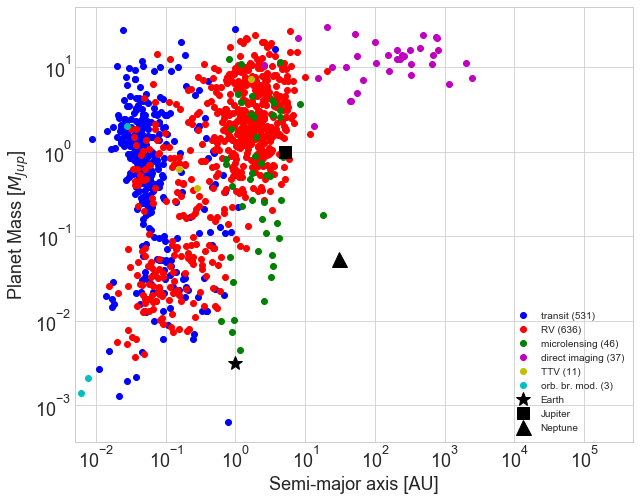

In [35]:
#Constants that will be useful later
M_E = 5.972e24 #kg
a_E = 149.60e6 #m 
R_E = 6371e3 #km
P_E = 365 #d

M_J = 1.898e27 #kg
a_J = 778.57e6 #m
R_J = 69911e3 #m
P_J = 11.86*P_E

M_N = 1.024e26
a_N = 4495.06e6 #m
R_N = 24622e3 #m
P_N = 164.8*P_E

fig = plt.figure(figsize=(10,8))
plt.plot(df_transit['pl_orbsmax'],df_transit['pl_bmassj'],'bo', label='transit ({})'.format(np.count_nonzero(df_transit['pl_bmassj']>0)))
plt.plot(df_RV['pl_orbsmax'],df_RV['pl_bmassj'],'ro', label='RV ({})'.format(np.count_nonzero(df_RV['pl_bmassj']>0)))
plt.plot(df_ML['pl_orbsmax'],df_ML['pl_bmassj'],'go', label='microlensing ({})'.format(np.count_nonzero(df_ML['pl_bmassj']>0)))
plt.plot(df_DI['pl_orbsmax'],df_DI['pl_bmassj'],'mo', label='direct imaging ({})'.format(np.count_nonzero(df_DI['pl_bmassj']>0)))
plt.plot(df_TTV['pl_orbsmax'],df_TTV['pl_bmassj'],'yo', label='TTV ({})'.format(np.count_nonzero(df_TTV['pl_bmassj']>0)))
plt.plot(df_OBM['pl_orbsmax'],df_OBM['pl_bmassj'],'co', label='orb. br. mod. ({})'.format(np.count_nonzero(df_OBM['pl_bmassj']>0)))
plt.xlabel('Semi-major axis [AU]')
plt.ylabel('Planet Mass [$M_{Jup}$]')
plt.xlim([5e-3, 5e5])
plt.xscale('log')
plt.yscale('log')
plt.plot(a_E/a_E,M_E/M_J,'k*', markersize=15, label='Earth')
plt.plot(a_J/a_E,M_J/M_J,'ks', markersize=12, label='Jupiter')
plt.plot(a_N/a_E,M_N/M_J,'k^', markersize=15, label='Neptune')
plt.legend(loc=4, numpoints = 1, fontsize=10)
plt.show()

So now we can see which particular technique is effective in which region of parameter space. 

* Direct imaging (magenta dots) is effective at finding planets faraway from their host stars while 
* Transit is effective at smaller separations. 

Why do you think so?

And pay attention to the region close to the black star (i.e. Earth). Have we seen exoplanets that occupy the same region as Earth? Not much. Finding and characterizing Earth-like exoplanets is a mainstream research in exoplanets. There are tons of reasons why this is such a technological challenge. We will probably discuss more on that on separate tutorial. 

# Exercises:
* Explore the different planet parameters such as eccentricity, inclination, effective temperature, etc. by utilizing various plots
* Explore the stellar parameters of planets such as effective spectral type, temperature, metallicity, etc.

### Scatter-matrix

For advanced students, we recommend trying various plots offered by the `pandas` library. An example is the [`scattermatrix`](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#scatter-matrix-plot).

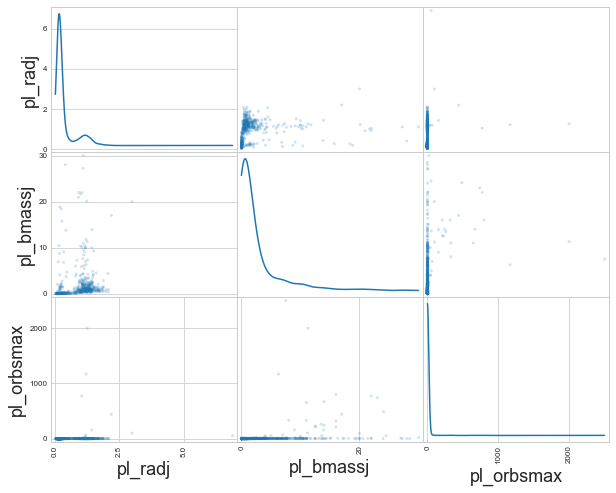

In [36]:
from pandas.plotting import scatter_matrix

#import seaborn as sb
#sb.set_style('whitegrid')

scatter_matrix(df[['pl_radj', 'pl_bmassj', 'pl_orbsmax']], alpha=0.2, diagonal='kde', figsize=(10,8));

### Pairplots
This is a powerful way to survey relationship among variables. A particular scattered pairplot implies no correlation while a distribution with a definite slope implies otherwise. Be sure to try varying the keyword parameters.

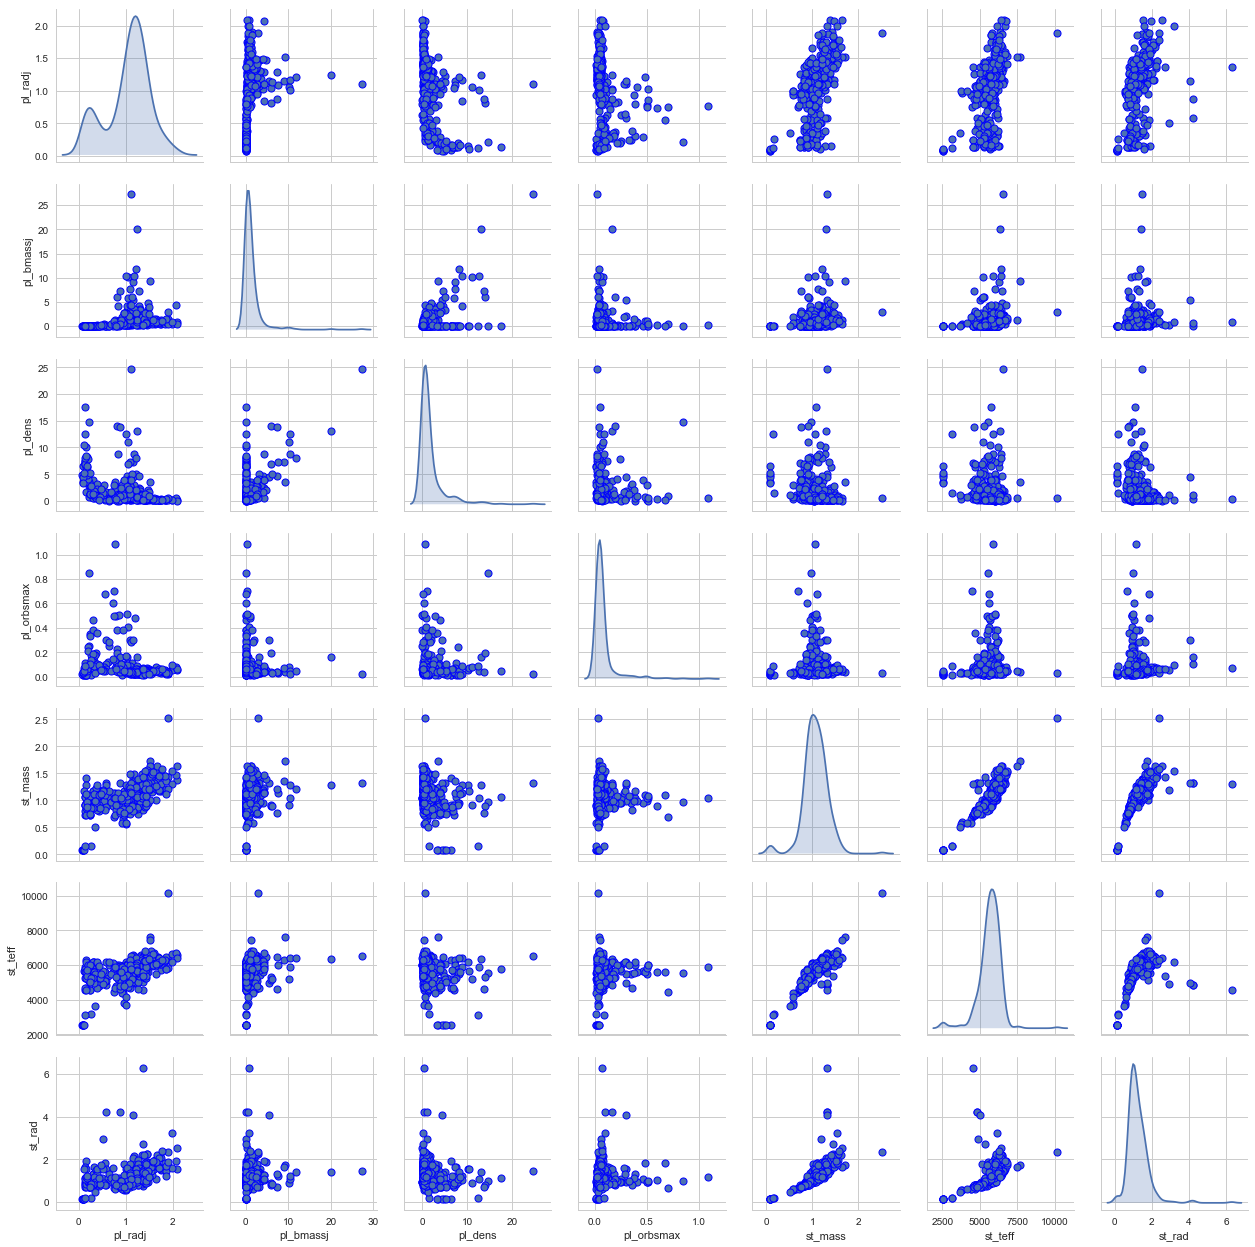

In [37]:
import seaborn as sb
sb.set_style('whitegrid')

variables=df[['pl_radj', 'pl_bmassj', 'pl_dens', 'pl_orbsmax',"st_mass","st_teff","st_rad"]].dropna()
sb.pairplot(variables, diag_kind="kde", plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True));
#, hue="pl_discmethod", markers="+"